In [1]:
from utils import load_parquet_to_df_list


path = "../../../../0_data/synth_pattern_data_for_synth_drive_generation"
df_list = load_parquet_to_df_list(path)

# do not use metadata of time series
df_orig = [df["dim_0"].to_frame() for df in df_list]

In [2]:
df_orig[0]

,dim_0
0,70.902463
1,70.282942
2,68.703804
3,64.193219
4,60.321183
...,...
896,79.357289
897,88.933892
898,83.036114
899,85.052833


In [3]:
from utils import z_normalize


# additionally cut of some time series for a shorter representation
df_norm = [z_normalize(df) for df in df_orig[:3]]
num_dfs = len(df_norm)

In [4]:
from discretization.sax.sax import SAX
from discretization.sax.one_d_sax import OneDSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.persist.persist import Persist


alphabet_size = 5
alphabet_size_slope = 8

sax = SAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size, alphabet_size_slope)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
persist = Persist(alphabet_size)


# motif length in original time series = len_symbolic_subsequence * window_size
sax_variant = sax
# number of segments to be looked at, various symbols within segment, depends on SAX variant
num_compare_segments = 4
window_size = 5
# is higher for 1d-SAX and even higher for eSAX, because they contain more symbols per segment
max_distance = 0.01

In [5]:
from pattern_recognition.motif_discovery.matrix_profile.discretized import do_matrix_profile_discretized

# finds motifs directly on symbolic representations of time series --> very few points
motifs = [do_matrix_profile_discretized(df_norm_ts, window_size, sax_variant, num_compare_segments, max_distance)
         for df_norm_ts in df_norm]

In [6]:
# start and end are adjusted such that indexes for symbolic representations can simply be used
motifs_lst, start, end = motifs[0]
motifs_lst

[[[10, 27, 78, 109, 119, 127, 175],
  [35, 88],
  [16, 69, 114],
  [13, 32, 40, 122, 132, 167],
  [8, 63, 77, 107],
  [18, 26, 116, 126],
  [50, 58, 103],
  [28, 128],
  [0, 95, 154],
  [36, 89],
  [9, 19, 21, 64, 108, 117, 174],
  [33, 41, 123, 133],
  [143, 160],
  [14, 168],
  [34, 42, 87, 134, 148, 156],
  [1, 85],
  [22, 65],
  [29, 129],
  [56, 61],
  [73, 141],
  [11, 110, 120, 176],
  [75, 105],
  [17, 115],
  [7, 76, 106],
  [45, 137],
  [86, 147],
  [30, 130],
  [25, 125],
  [39, 166],
  [93, 140],
  [15, 68],
  [43, 135, 149, 157],
  [46, 138],
  [12, 111, 121],
  [31, 131],
  [44, 136, 150],
  [92, 139, 164],
  [49, 57],
  [94, 153],
  [54, 59, 104, 161],
  [55, 60, 162],
  [3, 169]]]

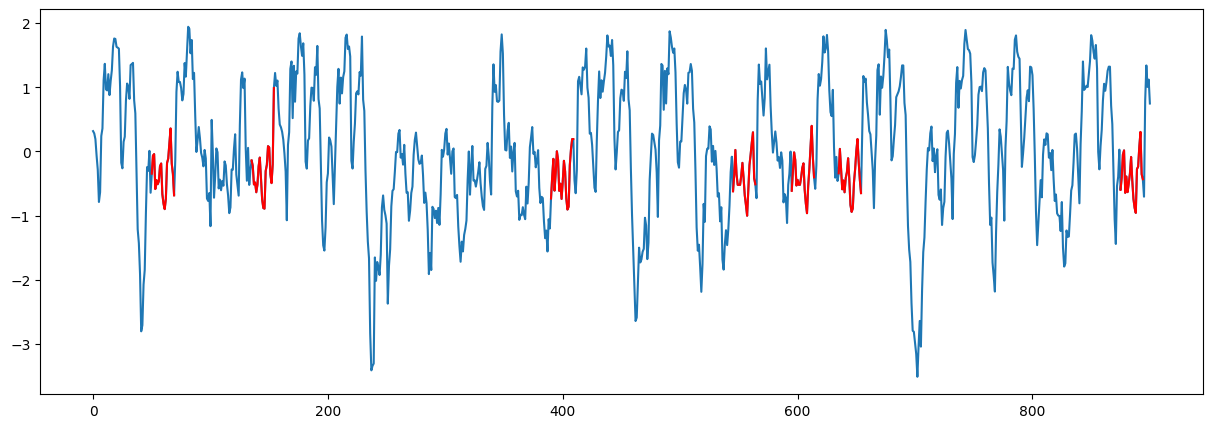

In [19]:
from pattern_recognition.motif_discovery.graphics import highlight_motif


highlight_motif(df_norm[0], start, end, motifs_lst[0][0], 0)